In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

In [2]:
h = 0.03
t = 1000

def aceleracion(x):
    return -np.pi**2 * x


In [3]:
def verlet(x0, v0, h ,t ):
    x= np.zeros(t)
    v= np.zeros(t)
    
    x[0] = x0
    v[0] = v0
    
    v[1] = v[0] + aceleracion(x[0]) * h
    x[1] = x[0] + v[1] * h
    
    for i in range(1, t - 1):
        x[i+1] = 2 * x[i] - x[i-1] + aceleracion(x[i]) * h**2
    return x
 


In [4]:
funcion= verlet(1,1, h, t)

<IPython.core.display.Javascript object>


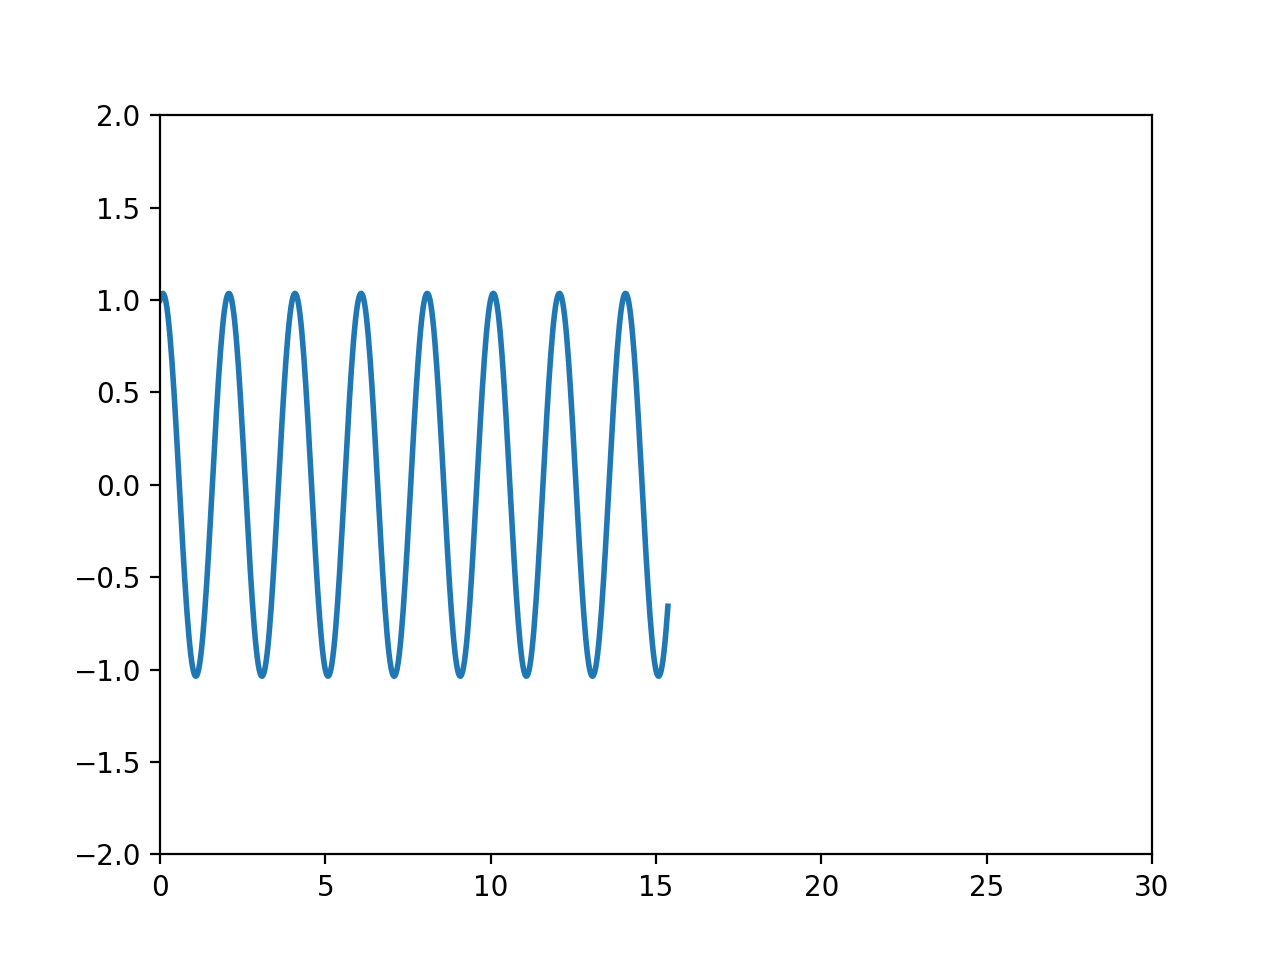

In [5]:
fig, ax = plt.subplots()
ax.set_xlim(0, t * h)
ax.set_ylim(-2, 2)
line, = ax.plot([], [], lw=2)

In [6]:
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x_data = np.arange(0, i * h, h)
    y_data = funcion[:i]
    line.set_data(x_data, y_data)
    return line,

ani = FuncAnimation(fig, animate, init_func=init, frames=t, interval=20, blit=True)